In [2]:
#importing libraries
import pandas as pd
import numpy as np
import dask.array as da

import os
import glob
import keras

from tensorflow.keras.utils import Sequence
import tensorflow
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

#import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize   # for resizing images
import os
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns

In [3]:
x_train = np.load('data/RGB_files/x_train.npy') / 255.
x_test = np.load('data/RGB_files/x_test.npy') / 255.
y_train = np.load('data/RGB_files/y_train.npy')
y_test = np.load('data/RGB_files/y_test.npy')

In [4]:
x_train.shape

(2400, 480, 640, 3)

In [5]:
y_train.shape

(2400, 12)

In [6]:
x_test.shape

(600, 480, 640, 3)

In [7]:
y_test.shape

(600, 12)

In [8]:
from skimage.transform import resize

x_train_resized = []

for i in x_train:
    x_train_resized.append(resize(i, (120, 160)))
    

x_test_resized = []

for i in x_test:
    x_test_resized.append(resize(i, (120, 160)))
    

x_train_resized = np.array(x_train_resized)
x_test_resized = np.array(x_test_resized)
print(x_train_resized.shape, x_test_resized.shape)

(2400, 120, 160, 3) (600, 120, 160, 3)


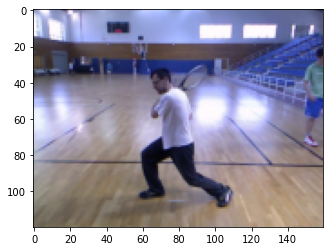

In [9]:
plt.imshow(x_train_resized[5])

In [10]:
#Using Keras Sequential API

batch_size = 128
num_classes = 12
epochs = 100

# input image dimensions
img_rows, img_cols = 120, 160


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 3)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu',padding='SAME'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='SAME'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

Metal device set to: Apple M1 Pro


2022-05-31 02:06:08.169192: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 02:06:08.169565: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 158, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 114, 154, 64)      51264     
                                                                 
 batch_normalization (BatchN  (None, 114, 154, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 114, 154, 64)      102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 57, 77, 64)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 57, 77, 64)       2

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train_resized, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_resized, y_test),
          callbacks=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
                   )

Epoch 1/100


2022-05-31 02:06:32.697848: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-31 02:06:33.152133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 74.3435 - accuracy: 0.1200

2022-05-31 02:06:50.517013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 19s 924ms/step - loss: 74.3435 - accuracy: 0.1200 - val_loss: 91.4060 - val_accuracy: 0.0833
Epoch 2/100
19/19 [==============================] - 17s 922ms/step - loss: 34.7645 - accuracy: 0.1913 - val_loss: 118.7543 - val_accuracy: 0.0833
Epoch 3/100
19/19 [==============================] - 17s 915ms/step - loss: 23.9089 - accuracy: 0.2504 - val_loss: 81.4012 - val_accuracy: 0.0850
Epoch 4/100
19/19 [==============================] - 17s 923ms/step - loss: 17.3707 - accuracy: 0.3504 - val_loss: 45.9686 - val_accuracy: 0.1150
Epoch 5/100
19/19 [==============================] - 17s 916ms/step - loss: 9.9180 - accuracy: 0.4504 - val_loss: 38.1656 - val_accuracy: 0.0833
Epoch 6/100
19/19 [==============================] - 17s 918ms/step - loss: 9.6644 - accuracy: 0.4888 - val_loss: 45.1351 - val_accuracy: 0.1167
Epoch 7/100
19/19 [==============================] - 18s 930ms/step - loss: 9.3059 - accuracy: 0.5271 - val_loss: 36.9764 - val_accuracy:

In [14]:
score1 = model.evaluate(x_test_resized, y_test, verbose=0)
score2 = model.evaluate(x_train_resized, y_train, verbose=0)

2022-05-31 02:11:50.167609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [15]:
print('Test loss:', score1)
print('Train loss:', score2)

Test loss: [36.97636795043945, 0.10833333432674408]
Train loss: [16.63172721862793, 0.2212500125169754]


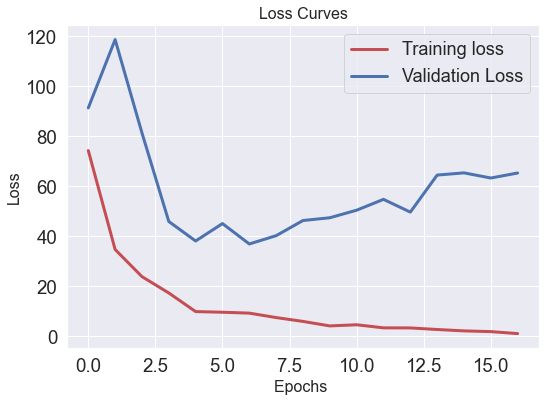

In [21]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.tight_layout()
plt.savefig('baseline_loss_curve.jpg')

In [17]:
shots = ['backhand', 
         'backhand2hands', 
         'backhand_slice', 
         'backhand_volley', 
         'flat_service', 
         'forehand_flat', 
         'forehand_openstands', 
         'forehand_slice', 
         'forehand_volley', 
         'kick_service', 
         'slice_service', 
         'smash']

y_pred = model.predict(x_test_resized)

pred_labels = np.argmax(y_pred,axis=1)

true_labels = np.argmax(y_test,axis=1)

2022-05-31 02:12:05.600998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [18]:
metrics.classification_report(true_labels,pred_labels,target_names=shots)

/Users/nihaalz/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nihaalz/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nihaalz/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                     precision    recall  f1-score   support\n\n           backhand       0.00      0.00      0.00        50\n     backhand2hands       0.15      0.32      0.20        50\n     backhand_slice       0.00      0.00      0.00        50\n    backhand_volley       0.00      0.00      0.00        50\n       flat_service       0.04      0.16      0.06        50\n      forehand_flat       0.00      0.00      0.00        50\nforehand_openstands       0.00      0.00      0.00        50\n     forehand_slice       0.00      0.00      0.00        50\n    forehand_volley       0.86      0.12      0.21        50\n       kick_service       0.00      0.00      0.00        50\n      slice_service       0.00      0.00      0.00        50\n              smash       0.13      0.70      0.23        50\n\n           accuracy                           0.11       600\n          macro avg       0.10      0.11      0.06       600\n       weighted avg       0.10      0.11      0.06       600\n'

In [19]:
conf_matrix = metrics.confusion_matrix(true_labels,pred_labels)
df_cm = pd.DataFrame(conf_matrix, index = [i for i in shots],columns = [i for i in shots])

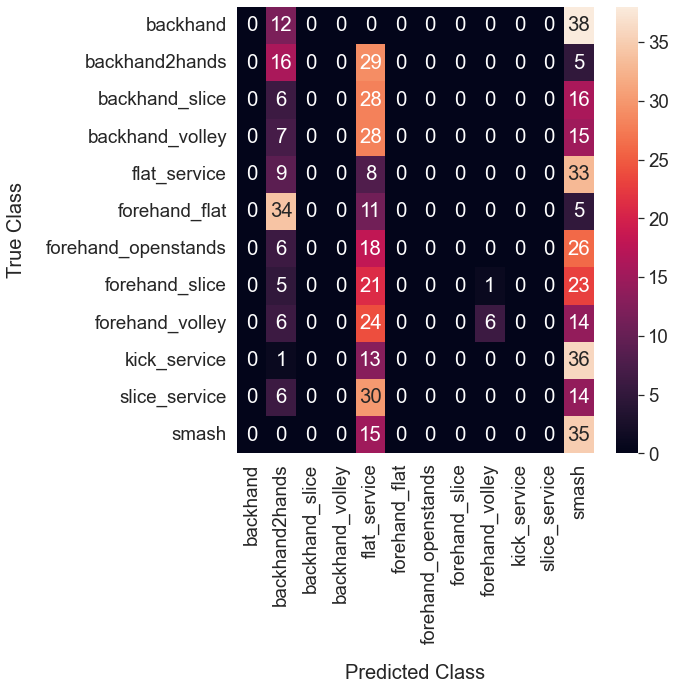

In [22]:
sns.set(font_scale=1.7)
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_cm,annot=True)
ax.set_xlabel('Predicted Class',fontsize=20,labelpad=20)
ax.set_ylabel('True Class',fontsize=20,labelpad=20)
plt.tight_layout()
plt.savefig('baseline_confusion_matrix.jpg')

In [23]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}